<a href="https://colab.research.google.com/github/KKeun-B/learning/blob/main/2020/hyperbolic_50steps_graph_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Hyperbolic_Next_Step(U, CFL=1.0):
    PI = math.pi
    dx = 5.0
    dt = 0.02
    end_t = 1.0
    L = 400
    alpha = 250.0
    N = int(float(L)/dx)
    iter = int(end_t/dt)
    iter = 50
 
    Unew = np.zeros(N)
    Ua = np.zeros((iter+1,N), dtype='float64')
    U[0] = 0.0
    Unew[0] = 0.0
    U[N-1] = 0.0
    Unew[N-1] = 0.0
    for j in range(iter+1):
      for i in range(1, N-1):
            Unew[i] = U[i] - CFL * (U[i]-U[i-1])
            Ua[j][i]=U[i]
      U = Unew.copy()
      U[0] = 0.0
      Unew[0] = 0.0
      U[N-1] = 0.0
      Unew[N-1] = 0.0
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 80, N)
    colors = plt.cm.jet(np.linspace(0,1,iter+1))
    for j in range(iter+1):
      plt.plot(x, Ua[j], color=colors[j]);
    fig.savefig('my_figure.png')



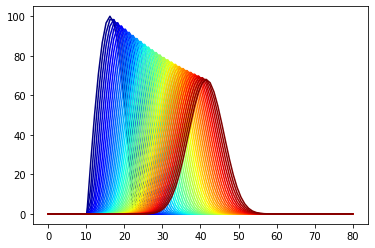

In [3]:
def Initial_Condition():
    PI = math.pi
    dx = 5.0
    L = 400
    N = int(float(L)/dx)
    U = np.zeros((N))
    for i in range(int(50.0/dx) , int(110.0/dx+1)):
        U[i] = abs(100.0 * (math.sin(PI*(i*dx - 50.0)/60.0)))
    return U

U = Initial_Condition()
Hyperbolic_Next_Step(U, CFL=0.5)